In [120]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

sns.set(style="whitegrid", palette="Blues_r")
palette=['#2c3e6c', '#b0c4de']


In [121]:
df = pd.read_csv("Project_Data.csv")

print("Data Shape:", df.shape)
print("Data Nulls:\n", df.isna().sum())

# Check logical reason for churn_reason nulls
nullReason = df[df['Churn Reason'].isna()].copy()
print("Churn Reason null check:\n", nullReason['Churn Value'].value_counts())

# Rename columns for consistency early on
df = df.rename(columns={
    'CustomerID': 'customer_id',
    'Churn Label': 'churn_flag',
    'Churn Value': 'churn_value',
    'Churn Reason': 'churn_reason',
    'Tenure Months': 'tenure_months',
    'Monthly Charges': 'monthly_charges',
    'Total Charges': 'total_charges'
})


Data Shape: (7043, 31)
Data Nulls:
 CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64
Churn Reason null check:
 Churn Value
0    5174
Name: count, dtype: int64


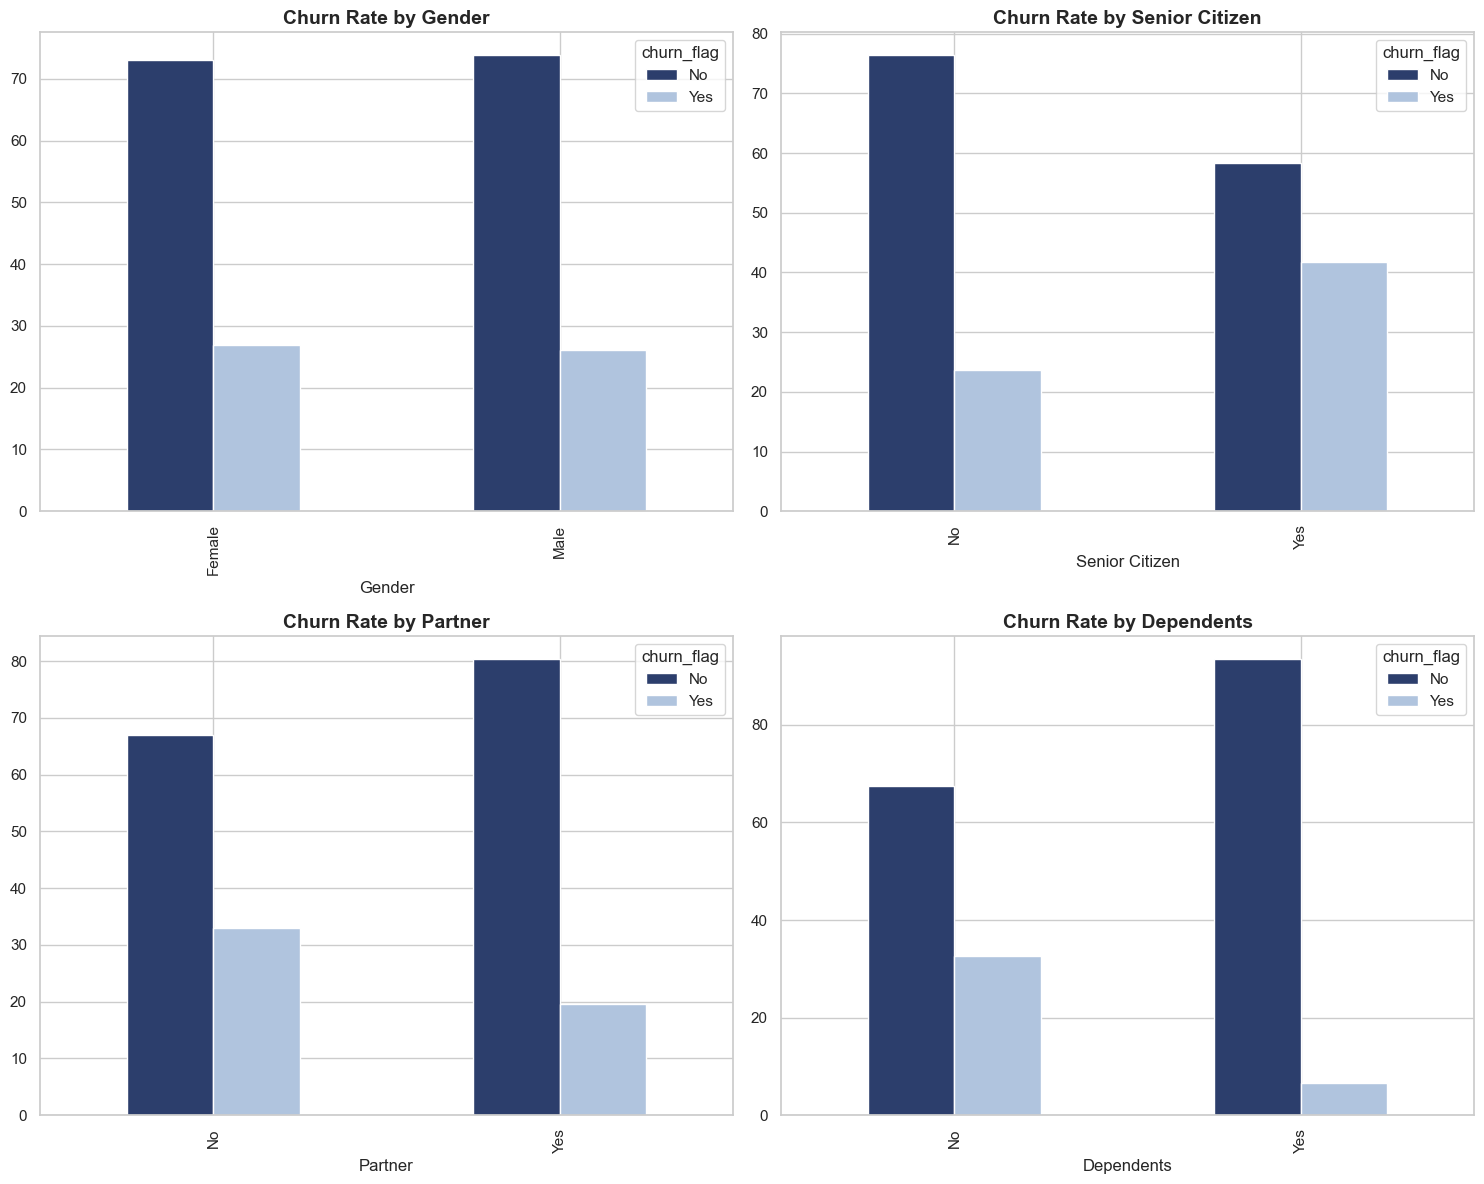

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Churn by Gender
gender_churn = pd.crosstab(df['Gender'], df['churn_flag'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0,0], color=palette)
axes[0,0].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')

# Churn by Senior Citizen
senior_churn = pd.crosstab(df['Senior Citizen'], df['churn_flag'], normalize='index') * 100
senior_churn.plot(kind='bar', ax=axes[0,1], color=palette)
axes[0,1].set_title('Churn Rate by Senior Citizen', fontsize=14, fontweight='bold')

# Churn by Partner
partner_churn = pd.crosstab(df['Partner'], df['churn_flag'], normalize='index') * 100
partner_churn.plot(kind='bar', ax=axes[1,0], color=palette)
axes[1,0].set_title('Churn Rate by Partner', fontsize=14, fontweight='bold')

# Churn by Dependents
dependents_churn = pd.crosstab(df['Dependents'], df['churn_flag'], normalize='index') * 100
dependents_churn.plot(kind='bar', ax=axes[1,1], color=palette)
axes[1,1].set_title('Churn Rate by Dependents', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\3489098999.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn_flag', y='monthly_charges', ax=axes[1,1], palette=palette)


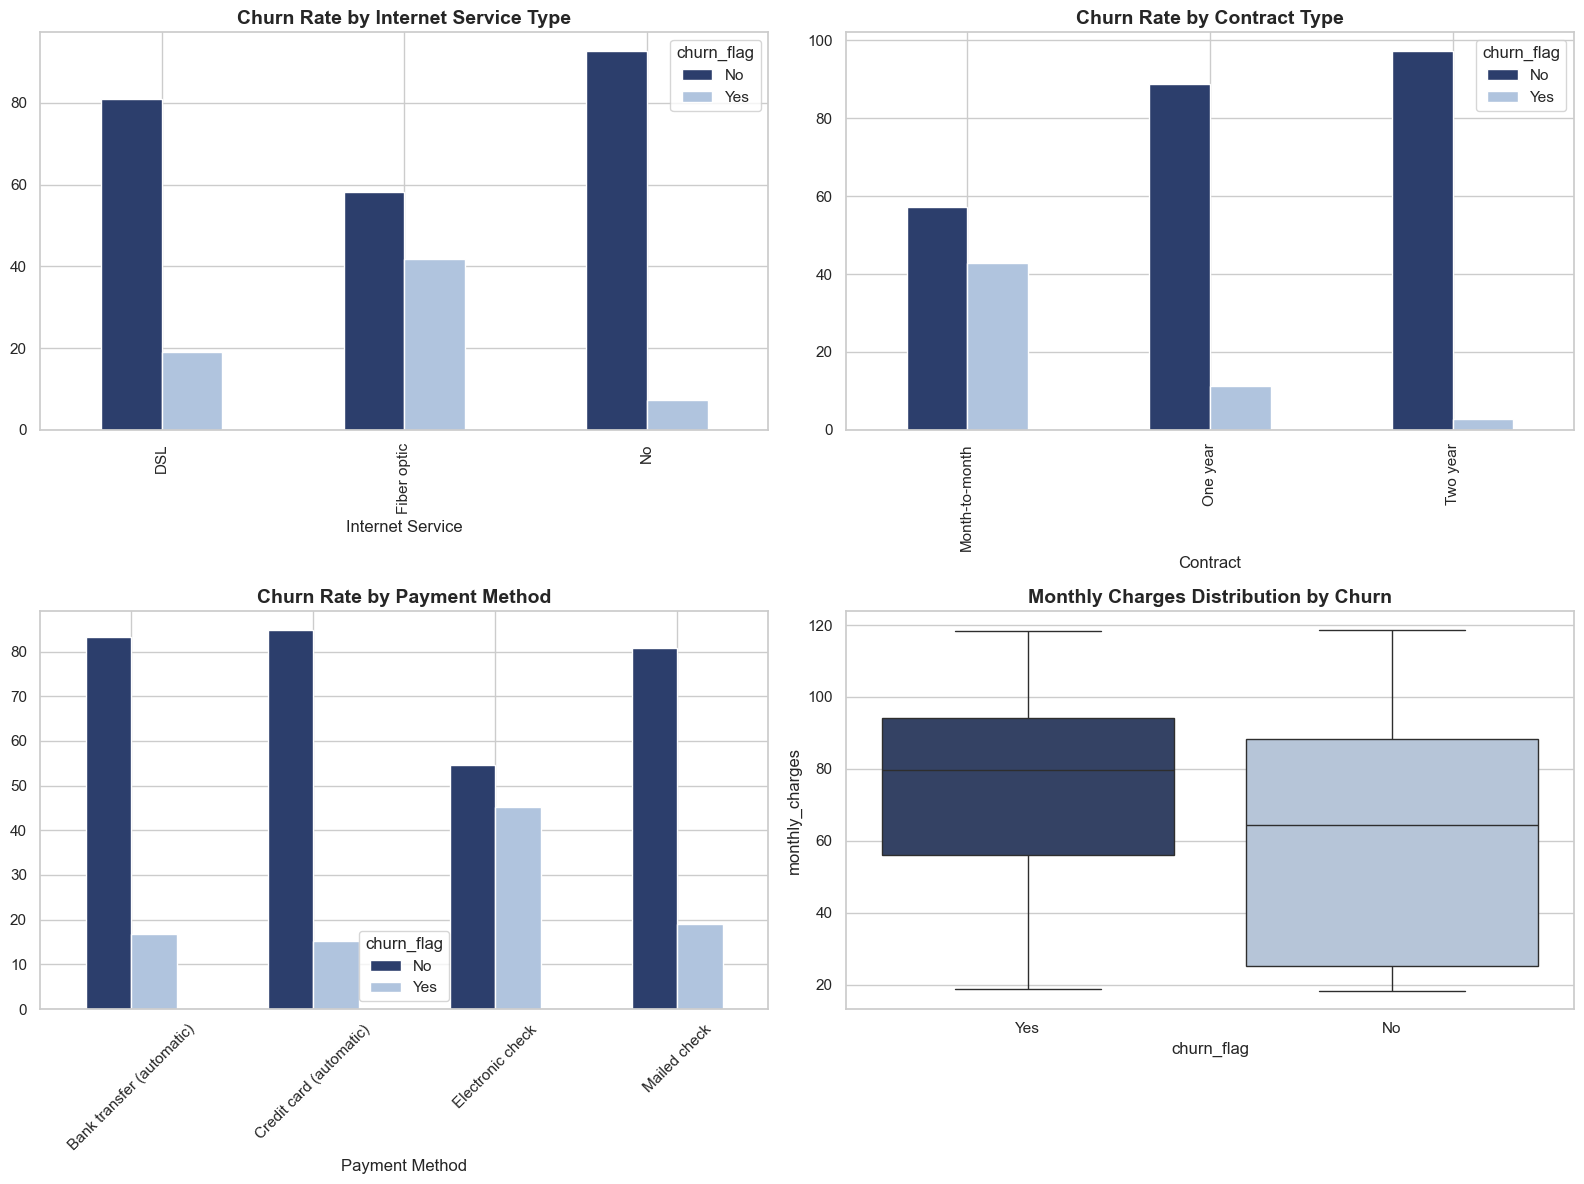

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Internet Service
internet_churn = pd.crosstab(df['Internet Service'], df['churn_flag'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=axes[0,0], color=palette)
axes[0,0].set_title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')

# Contract Type
contract_churn = pd.crosstab(df['Contract'], df['churn_flag'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[0,1], color=palette)
axes[0,1].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')

# Payment Method
payment_churn = pd.crosstab(df['Payment Method'], df['churn_flag'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1,0], color=palette)
axes[1,0].set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Monthly Charges
sns.boxplot(data=df, x='churn_flag', y='monthly_charges', ax=axes[1,1], palette=palette)
axes[1,1].set_title('Monthly Charges Distribution by Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


,All Churners,Fiber Optic,DSL,No Internet,FiberOptic_%,DSL_%,NoInternet_%
churn_reason,,,,,,,
Attitude of support person,192,133,41,18.0,69.27,21.35,9.38
Competitor offered higher download speeds,189,130,51,8.0,68.78,26.98,4.23
Competitor offered more data,162,120,31,11.0,74.07,19.14,6.79
Don't know,154,97,51,6.0,62.99,33.12,3.90
Competitor made better offer,140,104,23,13.0,74.29,16.43,9.29
Attitude of service provider,135,101,29,5.0,74.81,21.48,3.70
Competitor had better devices,130,82,44,4.0,63.08,33.85,3.08
Network reliability,103,67,30,6.0,65.05,29.13,5.83
Product dissatisfaction,102,66,30,6.0,64.71,29.41,5.88


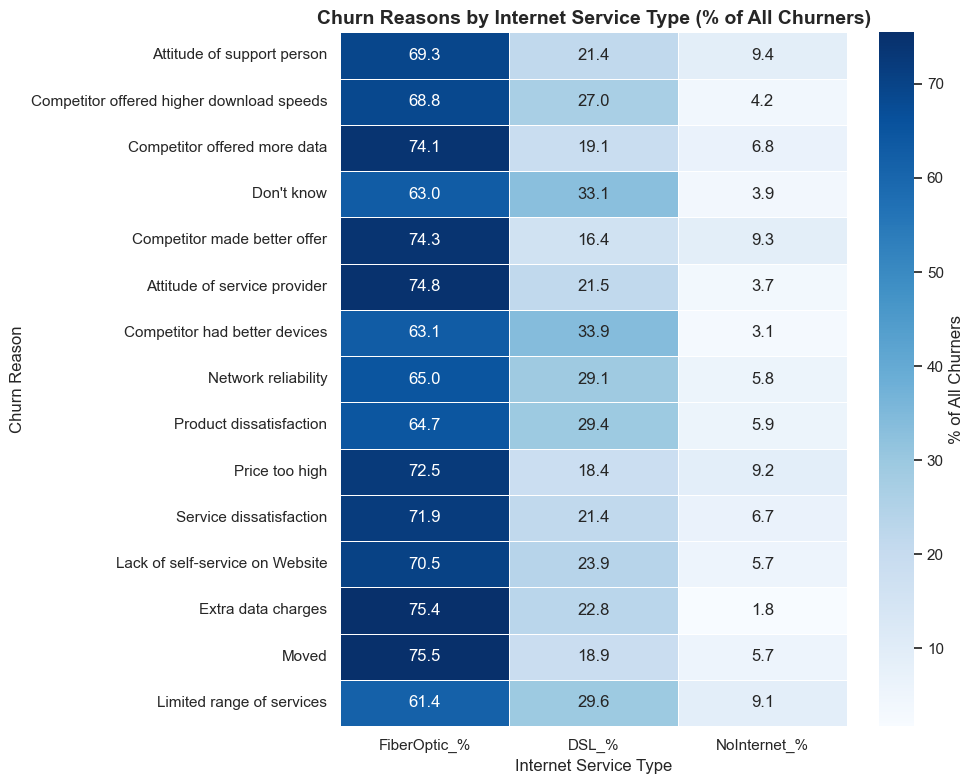

In [124]:
# Filter churned customers
churned_df = df[df['churn_value'] == 1].copy()

# Count total churn reasons
all_reasons = churned_df['churn_reason'].value_counts()

# Count churn reasons per internet type
fibre_reasons = churned_df[churned_df['Internet Service'] == 'Fiber optic']['churn_reason'].value_counts()
dsl_reasons   = churned_df[churned_df['Internet Service'] == 'DSL']['churn_reason'].value_counts()
none_reasons  = churned_df[churned_df['Internet Service'] == 'No']['churn_reason'].value_counts()

# Combine into a single DataFrame
compare = pd.concat([all_reasons, fibre_reasons, dsl_reasons, none_reasons], axis=1)
compare.columns = ['All Churners', 'Fiber Optic', 'DSL', 'No Internet']
compare = compare.fillna(0)

# Calculate each as % of all churners
compare['FiberOptic_%'] = (compare['Fiber Optic'] / compare['All Churners']) * 100
compare['DSL_%']        = (compare['DSL'] / compare['All Churners']) * 100
compare['NoInternet_%'] = (compare['No Internet'] / compare['All Churners']) * 100

# Sort by Fibre share for readability
compare = compare.sort_values('All Churners', ascending=False).round(2)

# Display top 15 churn reasons
display(compare.head(15))

compare_pct = compare[['FiberOptic_%', 'DSL_%', 'NoInternet_%']].head(15)

plt.figure(figsize=(10, 8))
sns.heatmap(compare_pct, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': '% of All Churners'})
plt.title("Churn Reasons by Internet Service Type (% of All Churners)", fontsize=14, fontweight='bold')
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()

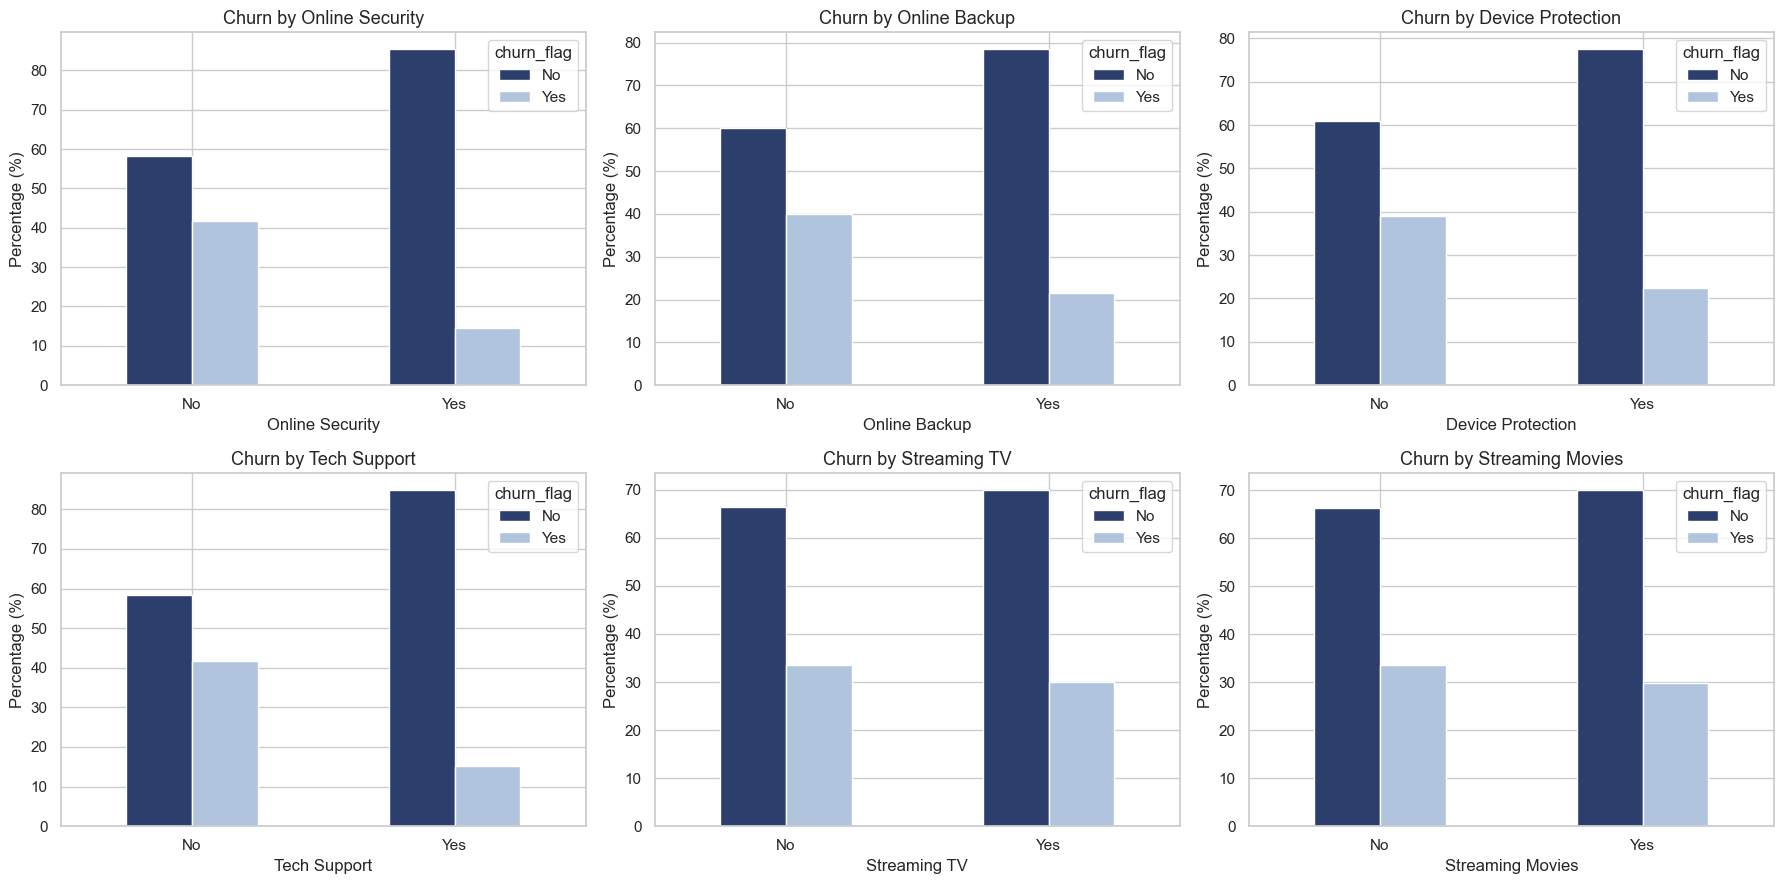

In [125]:
columns = ['Online Security', 'Online Backup', 'Device Protection',
           'Tech Support', 'Streaming TV', 'Streaming Movies']
titles = ['Online Security', 'Online Backup', 'Device Protection',
          'Tech Support', 'Streaming TV', 'Streaming Movies']

fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()

df_internet = df[df['Internet Service'] != 'No']

for idx, (col, title) in enumerate(zip(columns, titles)):
    crosstab = pd.crosstab(df_internet[col], df_internet['churn_flag'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[idx], color=palette)
    axes[idx].set_title(f'Churn by {title}', fontsize=13)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


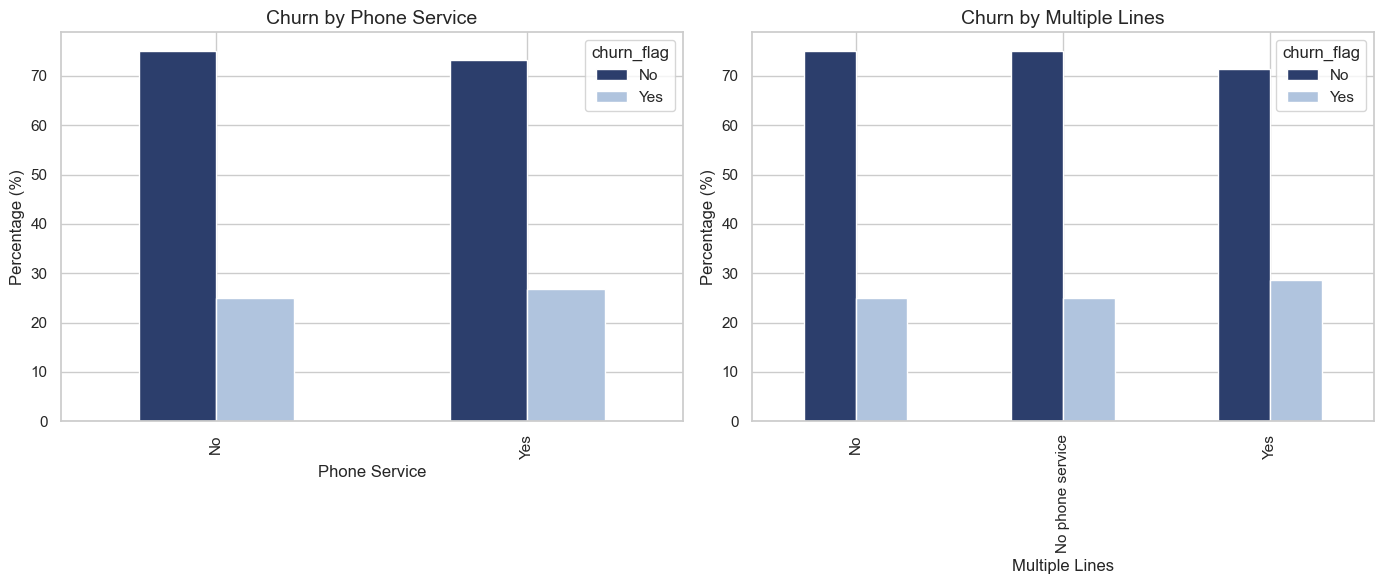

In [126]:
columns = ['Phone Service', 'Multiple Lines']
titles = ['Churn by Phone Service', 'Churn by Multiple Lines']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, (col, title) in enumerate(zip(columns, titles)):
    crosstab = pd.crosstab(df[col], df['churn_flag'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[idx], color=palette)
    axes[idx].set_title(title, fontsize=14)
    axes[idx].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


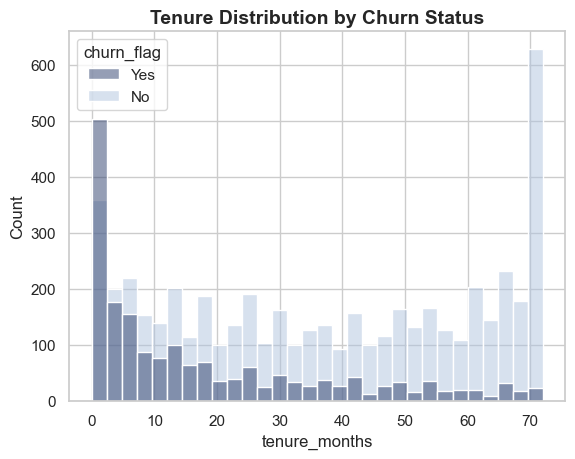

In [127]:
sns.histplot(data=df, x='tenure_months', hue='churn_flag', bins=30, palette=palette)
plt.title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.show()


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\2414609830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reasonCounts, x='Churn Reason', y='Count', palette='Blues_r')


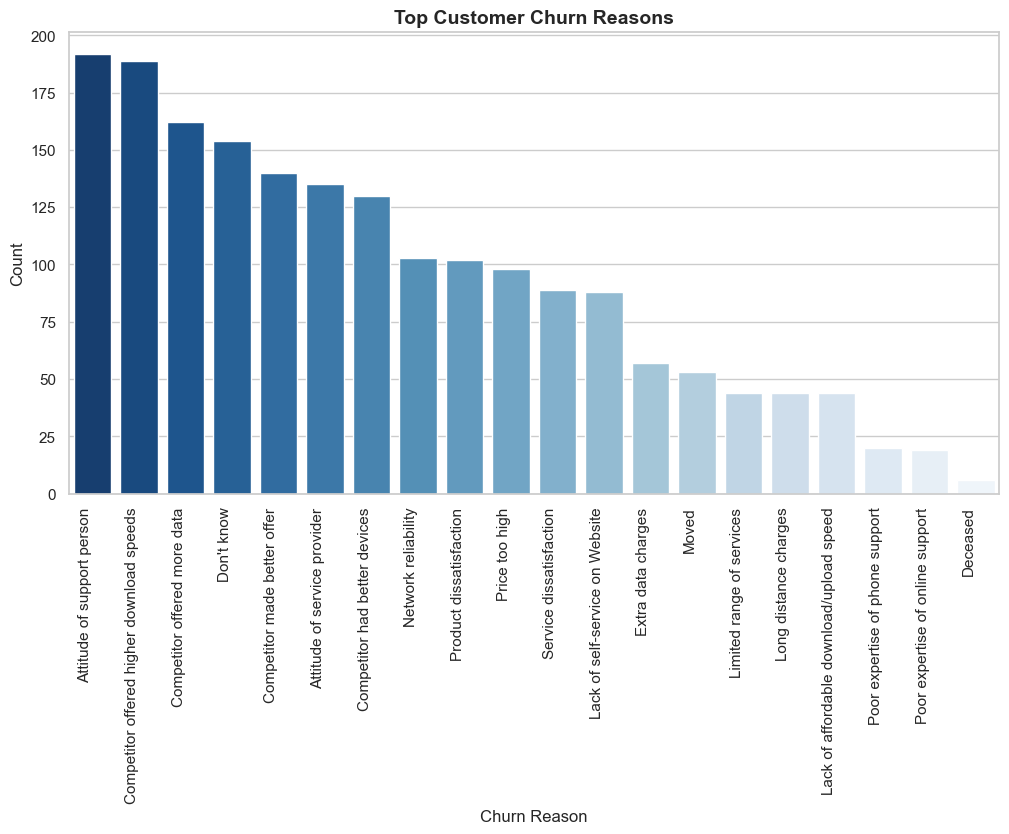

In [128]:
churned = df[df['churn_value'] == 1]
reasonCounts = churned['churn_reason'].value_counts().reset_index()
reasonCounts.columns = ['Churn Reason', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(data=reasonCounts, x='Churn Reason', y='Count', palette='Blues_r')
plt.xticks(rotation=90, ha='right')
plt.title('Top Customer Churn Reasons', fontsize=14, fontweight='bold')
plt.show()


In [129]:
# Create estimated lifetime value
df['estimated_lifetime_value'] = df['monthly_charges'] * df['tenure_months']

# Separate churned customers
churned_df = df[df['churn_value'] == 1].copy()

# Calculate the overall financial loss
total_loss = churned_df['estimated_lifetime_value'].sum()
print(f"Total Estimated Lifetime Value Lost to Churn: £{total_loss:,.0f}")

# Define threshold for top 10%
threshold = churned_df['estimated_lifetime_value'].quantile(0.90)

# Identify high-value churners
high_value_churners = churned_df[churned_df['estimated_lifetime_value'] >= threshold].copy()

# Calculate stats
num_high_value = len(high_value_churners)
share_high_value = num_high_value / len(churned_df)

# Total lifetime value among churners
total_churn_value = churned_df['estimated_lifetime_value'].sum()
high_value_total = high_value_churners['estimated_lifetime_value'].sum()

# Share of total churned lifetime value
value_share = high_value_total / total_churn_value

print(f"High-Value Threshold: £{threshold:,.0f}")
print(f"Number of High-Value Churners: {num_high_value}")
print(f"Share of Total Churners: {share_high_value:.1%}")
print(f"Total Lifetime Value of High-Value Churners: £{high_value_total:,.0f}")
print(f"Share of Total Churned Lifetime Value: {value_share:.1%}")


Total Estimated Lifetime Value Lost to Churn: £2,862,577
High-Value Threshold: £4,597
Number of High-Value Churners: 187
Share of Total Churners: 10.0%
Total Lifetime Value of High-Value Churners: £1,123,770
Share of Total Churned Lifetime Value: 39.3%


In [133]:
# Combine the two datasets
compare_df = pd.concat([
    df.assign(Group='All Customers'),
    high_value_churners.assign(Group='High-Value Churners')
])

demo_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

# Initialize an empty list to store each feature's comparison table
tables = []

for feature in demo_features:
    # Count values within each Group and normalize to get percentages
    feature_pct = (
        compare_df.groupby(['Group', feature])
        .size()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
        .unstack()
        .round(1)
    )
    tables.append(feature_pct)

# Concatenate all tables with spacing between
for feature_table in tables:
    display(feature_table)


,Gender,Female,Male
Group,Group,,
All Customers,All Customers,49.5,50.5
High-Value Churners,High-Value Churners,42.2,57.8


,Senior Citizen,No,Yes
Group,Group,,
All Customers,All Customers,83.8,16.2
High-Value Churners,High-Value Churners,70.6,29.4


,Partner,No,Yes
Group,Group,,
All Customers,All Customers,51.7,48.3
High-Value Churners,High-Value Churners,31.0,69.0


,Dependents,No,Yes
Group,Group,,
All Customers,All Customers,76.9,23.1
High-Value Churners,High-Value Churners,98.4,1.6


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\3449881145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reasons.values, y=reasons.index, palette='Blues_r')


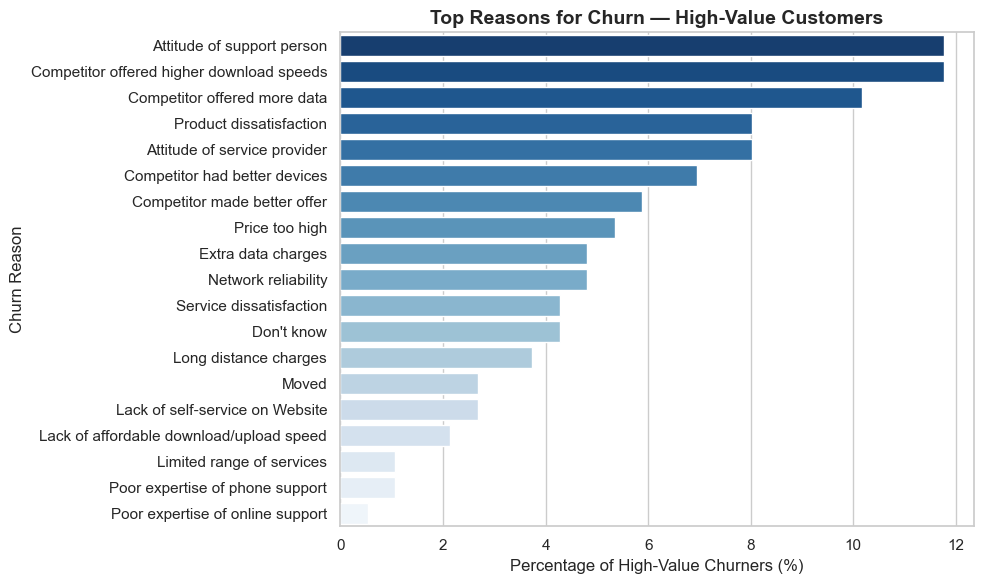

In [131]:
reasons = high_value_churners['churn_reason'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=reasons.values, y=reasons.index, palette='Blues_r')
plt.title("Top Reasons for Churn — High-Value Customers", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of High-Value Churners (%)")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()
